In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([1.,2.,3.,4.,5.])
y=np.array([1.,3.,2.,3.,5.])

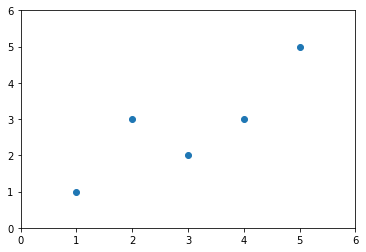

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [4]:
x_mean=np.mean(x)
y_mean=np.mean(y)

In [5]:
num=0.0
d=0.0

In [6]:
for x_i,y_i in zip(x,y):
    num+=(x_i-x_mean)*(y_i-y_mean)
    d+=(x_i-x_mean)**2

In [7]:
a=num/d
b=y_mean-a*x_mean


In [8]:
y_hat=a*x+b

[0, 6, 0, 6]

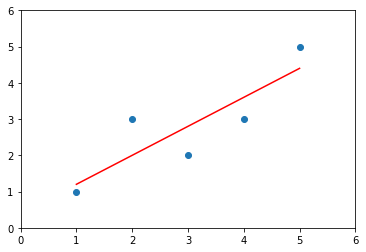

In [9]:
plt.scatter(x,y)
plt.plot(x,y_hat,color="r")
plt.axis([0,6,0,6])

In [10]:
print(a,b)

0.8 0.39999999999999947


In [11]:
a

0.8

In [12]:
x_predict=6
y_predict=a*x_predict+b

In [13]:
y_predict

5.2

In [14]:
from SimpleLinearRegression1 import SimpleLinearRegression1
from SimpleLinearRegression1 import SimpleLinearRegression2

In [15]:
m=100000
big_x=np.random.random(size=m)
big_y=big_x*2.0+3.0+np.random.normal(size=m)

In [16]:
reg1=SimpleLinearRegression1()
reg2=SimpleLinearRegression2()

In [17]:
%timeit reg1.fit(big_x,big_y)


228 ms ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit reg2.fit(big_x,big_y)

665 µs ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 衡量回归算法的标准

In [19]:
from sklearn import datasets

In [20]:
boston=datasets.load_boston()

In [21]:
x=boston.data[:,5]

In [22]:
x.shape

(506,)

In [23]:
y=boston.target

In [24]:
y.shape

(506,)

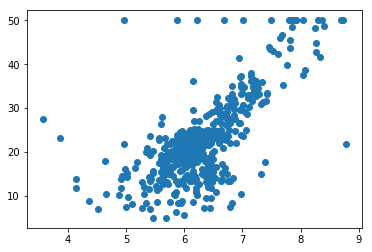

In [25]:
plt.scatter(x,y)

In [26]:
x=x[y<50.0]
y=y[y<50.0]

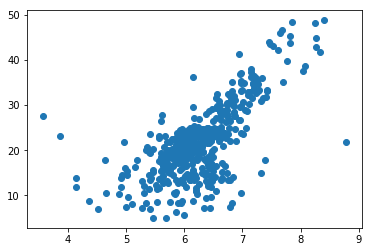

In [27]:
plt.scatter(x,y)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [29]:
x_test.shape

(123,)

In [30]:
x_train.shape

(367,)

In [31]:
reg=SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [32]:
reg.a_

8.44596521667348

In [33]:
reg.b_

-31.414005087653308

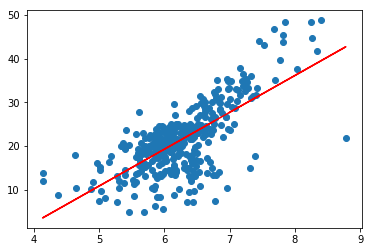

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color="r")

In [35]:
y_predict=reg.predict(x_test)

### MSE

In [36]:
mse_test=np.sum((y_predict-y_test)**2)/len(y_test)
mse_test

41.305341500784294

###RMSE

In [37]:
from math import sqrt
rmse_test=sqrt(mse_test)
rmse_test

6.426923175267018

### MAE

In [38]:
mse_test=np.sum(np.absolute(y_predict-y_test))/len(y_test)
mse_test

4.4250074662357815

### scikit-learn中的MSE MAE

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [43]:
sqrt(mean_squared_error(y_test,y_predict))

6.426923175267018

In [44]:
mean_absolute_error(y_test,y_predict)

4.4250074662357815

### R2 Sqared

In [49]:
1 - mean_squared_error(y_test,y_predict)/np.var(y_test)

0.39336155773644177

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.3933615577364419

### 多元线性回归

In [51]:
X=boston.data
y=boston.target
X=X[y<50.0]
y=y[y<50.0]

In [52]:
print(X.shape,y.shape)

(490, 13) (490,)


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [65]:
from LinearRegression import LinearRegression
reg=LinearRegression()
reg.fit_normal(X_train,y_train)

LinearRegression()

In [66]:
reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

In [67]:
reg.interception_

32.645660839640875

In [68]:
reg.score(X_test,y_test)

0.8008916199519345

### sklearn 中的线性回归

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
lin_reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

In [71]:
lin_reg.intercept_

32.645660839653466

In [72]:
lin_reg.score(X_test,y_test)

0.8008916199519102

### kNN Regressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
knn_reg.score(X_test,y_test)

0.602674505080953

### 跟多关于线性回归模型的讨论

In [74]:
X=boston.data
y=boston.target
X=X[y<50.0]
y=y[y<50.0]
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
lin_reg.coef_

array([-1.05574295e-01,  3.52748549e-02, -4.35179251e-02,  4.55405227e-01,
       -1.24268073e+01,  3.75411229e+00, -2.36116881e-02, -1.21088069e+00,
        2.50740082e-01, -1.37702943e-02, -8.38888137e-01,  7.93577159e-03,
       -3.50952134e-01])

In [76]:
boston.feature_names[np.argsort(lin_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [77]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      